## 3.4 数据变换

**基础知识**

In [1]:
import pandas as pd
path = "/Users/qiwsir/Documents/Codes/DataSet"
data = pd.read_csv(path + "/freefall/freefall.csv", index_col=0)
data.describe()

,time,location
count,100.000000,1.000000e+02
mean,250.000000,4.103956e+05
std,146.522832,3.709840e+05
min,0.000000,0.000000e+00
25%,124.997500,7.658593e+04
50%,250.000000,3.062812e+05
75%,375.002500,6.890859e+05
max,500.000000,1.225000e+06


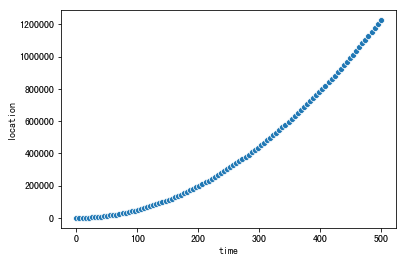

In [2]:
%matplotlib inline
import seaborn as sns
ax = sns.scatterplot(x='time', y='location', data=data)

In [3]:
import numpy as np
data.drop([0], inplace=True)    # 去掉0，不计算log0
data['logtime'] = np.log10(data['time'])    # ①
data['logloc'] = np.log10(data['location'])    # ②
data.head()

,time,location,logtime,logloc
1,5.05,124.99,0.703291,2.096875
2,10.10,499.95,1.004321,2.698927
3,15.15,1124.89,1.180413,3.051110
4,20.20,1999.80,1.305351,3.300987
5,25.25,3124.68,1.402261,3.494806


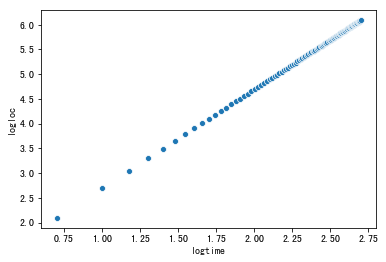

In [4]:
ax2 = sns.scatterplot(x='logtime', y='logloc', data=data)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(data['logtime'].values.reshape(-1, 1), data['logloc'].values.reshape(-1, 1))
(reg.coef_, reg.intercept_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(array([[1.99996182]]), array([0.69028797]))

In [7]:
import numpy as np
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
from sklearn.preprocessing import PolynomialFeatures    # ③
poly = PolynomialFeatures(2)    # ④
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

**项目案例**

In [9]:
path = "/Users/qiwsir/Documents/Codes/DataSet"
dc_data = pd.read_csv(path + '/boxcox/sample_data.csv')
dc_data.head()

,MONTH,AIR_TIME
0,1,28
1,1,29
2,1,29
3,1,29
4,1,29


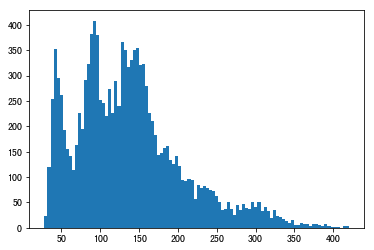

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
h = plt.hist(dc_data['AIR_TIME'], bins=100)

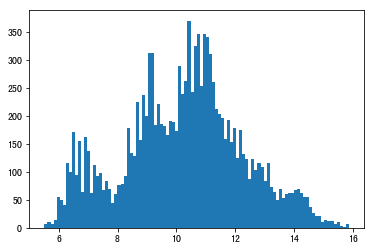

In [11]:
from scipy import stats
transform = np.asarray(dc_data[['AIR_TIME']].values)   
dft = stats.boxcox(transform)[0]   # ⑤
hbc = plt.hist(dft, bins=100)

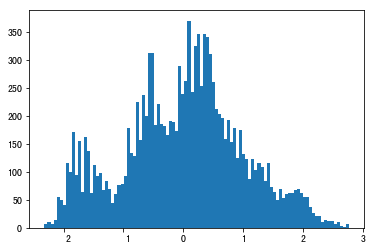

In [12]:
from sklearn.preprocessing import power_transform
dft2 = power_transform(dc_data[['AIR_TIME']], method='box-cox')    # ⑥
hbcs = plt.hist(dft2, bins=100)

**动手练习**

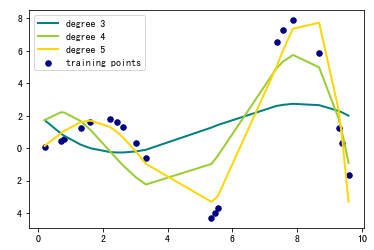

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

path = "/Users/qiwsir/Documents/Codes/DataSet"
df = pd.read_csv(path + "/xsin/xsin.csv")
colors = ['teal', 'yellowgreen', 'gold']
plt.scatter(df['x'], df['y'], color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())    # ③
    model.fit(df[['x']], df[['y']])
    y_pre = model.predict(df[['x']])
    plt.plot(df['x'], y_pre, color=colors[count], linewidth=2,
             label="degree %d" % degree)

plt.legend()